# Kriteria
1. (**DONE**) Menggunakan Salah Satu dari Dataset yang Telah Disediakan
2. Melakukan Seluruh Proses Analisis Data [**Min 2 pertanyaan bisnis dan 2 visualisasi data**]
3. (**DONE**) Proses Analisis Dibuat dalam Notebook yang Rapi
4. Membuat Dashboard Sederhana Menggunakan Streamlit

# Saran
1. Memberikan dokumentasi menggunakan markdown/text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan analisis data.
2. Membuat visualisasi data yang baik dan efektif dengan menerapkan prinsip desain dan integritas.
3. Deploy dashboard ke dalam streamlit cloud.
4. Menerapkan teknik analisis lanjutan seperti RFM analysis, geoanalysis, clustering, dll. (Tanpa menggunakan algoritma machine learning).

# Ketentuan Pengiriman Submission
* Berkas submission yang dikirim merupakan folder proyek analisis data dalam format ZIP. Ia mengandung beberapa berkas seperti berikut.
  1. Dataset yang digunakan dalam proses analisis data.
  2. Berkas Jupyter Notebook atau Colab Notebook (.ipynb). Pastikan berkas notebook tersebut sudah dijalankan.
  3. Berkas Python (.py) yang digunakan untuk membuat dashboard dengan streamlit.
  4. Berkas requirements.txt yang berisi berbagai library yang digunakan dalam proses analisis data. Berikut contoh berkas requirements yang digunakan pada proyek latihan: requirements.txt. Anda bisa menggunakan library pipreqs atau pipreqsnb (notebook) untuk menghasilkan berkas requirements secara otomatis berdasarkan import yang dilakukan.
  5. Berkas Markdown (README.md) yang berisi cara menjalankan dashboard (contoh: dicoding collection dashboard).

* Jika Anda menerapkan saran pertama, pastikan Anda memberikan penjelasan singkat mengenai tahapan analisis yang dilakukan dan insight dari output analisis tersebut.
* Jika Anda menerapkan saran kedua, pastikan seluruh visualisasi yang dibuat telah menerapkan prinsip desain dan integritas.
* Jika Anda menerapkan saran ketiga, tuliskan tautan untuk dashboard tersebut dalam berkas url.txt.
* Jika Anda menerapkan saran keempat, pastikan untuk menulis penjelasan terkait metode analisis yang digunakan dalam markdown/text cell pada berkas Jupyter Notebook atau Colab Notebook.

# Format Berkas Submission
Berkas submission yang dikirimkan merupakan sebuah folder yang disimpan dalam bentuk ZIP. Folder berisi beberapa berkas seperti berikut.

* Dataset yang digunakan dalam proses analisis data.
* Berkas Jupyter Notebook atau Colab Notebook (.ipynb).
* Berkas Python (.py).
* Berkas Markdown (README.md).
* Berkas requirements.txt.
* Berkas url.txt (jika menerapkan saran ketiga).

```
submission
├───dashboard
| ├───main_data.csv
| └───dashboard.py
├───data
| ├───data_1.csv
| └───data_2.csv
├───notebook.ipynb
├───README.md
└───requirements.txt
└───url.txt
```

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Vito Febrian Ananta
- **Email:** vitobriannt@gmail.com
- **ID Dicoding:** vitoananta3

## Menentukan Pertanyaan Bisnis

1. Berapa total pendapatan per bulan? (Untuk mengetahui pendapatan dan prediksi perkembangan perusahaan) (Prediction)

2. Bagaimana performa produk yang dijual berdasarkan kategorinya? (Untuk mengetahui kualitas produk yang dijual dan apa yang perlu dikembangkan)

3. Bagaimana performa waktu pengiriman? (Untuk dapat mengoptimasi waktu pengiriman)

4. Bagaimana demografi pelanggan? (Untuk mengetahui karakteristik pelanngan) (RFM)

## Import Semua Packages/Library yang Digunakan

In [1244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## Data Wrangling

### Gathering Data

Import CSVs

In [1245]:
customers_df = pd.read_csv('data/customers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
products_df = pd.read_csv('data/products_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')

Check: Imported data

In [1246]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e735b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1247]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [1248]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1249]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1250]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1251]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1252]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1253]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1254]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Assess customers

In [1255]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1256]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [1257]:
customers_df.duplicated().sum()

0

In [1258]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Assess geolocation

In [1259]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [1260]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [1261]:
geolocation_df.duplicated().sum()

261831

**[CLEAN]:** Clean duplicated values because it is duplicated [DONE]

In [1262]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Assess order items

In [1263]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**[CLEAN]:** Revise dtype of shipping_limit_date into datetime because is not the correct dtype [DONE]

In [1264]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [1265]:
order_items_df.duplicated().sum()

0

In [1266]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [1267]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [1268]:
order_items_df.max()

order_id               fffe41c64501cc87c801fd61db3f6244
order_item_id                                        21
product_id             fffe9eeff12fcbd74a2f2b007dde0c58
seller_id              ffff564a4f9085cd26170f4732393726
shipping_limit_date                 2020-04-09 22:35:08
price                                            6735.0
freight_value                                    409.68
dtype: object

**[CHECK]:** Are there any outliers? [DONE]

Assess order payments

In [1269]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [1270]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [1271]:
order_payments_df.duplicated().sum()

0

In [1272]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [1273]:
order_payments_df.max()

order_id                fffe41c64501cc87c801fd61db3f6244
payment_sequential                                    29
payment_type                                     voucher
payment_installments                                  24
payment_value                                   13664.08
dtype: object

**[CHECK]:** Are there any outliers? [DONE]

Assess order reviews

In [1274]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**[CLEAN]:** Revise dtype of:
- review_creation_date  
- review_answer_timestamp 

into datetime because is not the correct dtype [DONE]

In [1275]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**[NOTE]:** No need to drop because none of those matters to bussiness questions

In [1276]:
order_reviews_df.duplicated().sum()

0

In [1277]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Assess orders

In [1278]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**[CLEAN]:** Revise dtype of:
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

into datetime because is not the correct dtype [DONE]

In [1279]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**[NOTE]:** No need to clean duplicated values becasue none of those matters to bussines questions

In [1280]:
orders_df.duplicated().sum()

0

In [1281]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Assess product category name

In [1282]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [1283]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [1284]:
product_category_name_translation_df.duplicated().sum()

0

In [1285]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Assess products

In [1286]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1287]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**[CLEAN]:** Drop missing values [DONE]

In [1288]:
products_df.duplicated().sum()

0

In [1289]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Assess sellers

In [1290]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [1291]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [1292]:
sellers_df.duplicated().sum()

0

In [1293]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Clean geolocation

- duplicated values

In [1294]:
geolocation_df.duplicated().sum()

261831

In [1295]:
geolocation_df.drop_duplicates(inplace=True)

In [1296]:
geolocation_df.duplicated().sum()

0

Clean order items

- Revise dtype into datetime: shipping_limit_date 

In [1297]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1298]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])   

In [1299]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Clean order reviews

- Revise dtype into datetime:
    - review_creation_date  
    - review_answer_timestamp 

In [1300]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [1301]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [1302]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Clean orders

- Revise dtype into datetime of:
    - order_purchase_timestamp
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
    - order_estimated_delivery_date

In [1303]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1304]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [1305]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Products

- Missing values

In [1306]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1307]:
products_df[products_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Possible solutions:
- Drop: Not applicable because these producs category has order items
- Filling: Applicable for now

In [1308]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1309]:
# Filling roduct_category_name with 'others'
products_df['product_category_name'].fillna(value='others', inplace=True)

# Filling product_name_lenght with the mean
products_df['product_name_lenght'].fillna(value=products_df['product_name_lenght'].mean(), inplace=True)

# Filling product_description_lenght with the mean
products_df['product_description_lenght'].fillna(value=products_df['product_description_lenght'].mean(), inplace=True)

# Filling product_photos_qty with the mean
products_df['product_photos_qty'].fillna(value=products_df['product_photos_qty'].mean(), inplace=True)

In [1310]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

Explore orders

In [1311]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
79612,3f75656d4a9d4b3e18204bae2bd96925,887a7f0cf91952bc799bc7a555262389,delivered,2018-08-05 09:56:45,2018-08-05 10:25:14,2018-08-06 11:51:00,2018-08-07 13:08:41,2018-08-09
87171,a75fdbe33591254e4e2affc92886061f,b8238ce07cc469b6ce181da12100fd60,delivered,2018-06-24 19:31:43,2018-06-24 19:59:56,2018-06-25 13:34:00,2018-06-28 14:36:52,2018-07-17
16916,d5b1124327e83f25ce12d9c48c9ecfe3,c44dee37ceb2eba1a4c21adb28eec6a8,delivered,2017-07-08 09:26:51,2017-07-08 09:43:27,2017-07-13 20:23:52,2017-07-21 17:52:15,2017-08-01
52955,b1c47af65ac03344fe07e4e74245c300,6dca55c3c097a85c54cd691376901bac,delivered,2017-05-03 13:39:40,2017-05-03 14:02:44,2017-05-10 12:46:10,2017-05-16 10:39:51,2017-05-26
57630,b59646a3121fae6a722667ba7a4fcbc8,ae6e3c9254bdccf9777714139a303877,delivered,2018-01-10 16:02:43,2018-01-11 15:53:30,2018-01-12 11:57:09,2018-01-15 21:24:56,2018-02-05


In [1312]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df['delivery_time'] = delivery_time
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
43557,71e2f7733505074179563ccd72d93d15,28cf24314e32e953bfab6bd5c19d2440,delivered,2017-05-15 16:39:17,2017-05-16 16:50:10,2017-05-18 12:15:31,2017-05-23 13:33:06,2017-06-08,7 days 20:53:49
77187,390cb12cd3157360539ab0739c1b8fa9,edb85175262b80e62db167322a8501bd,delivered,2018-08-03 21:45:27,2018-08-03 22:23:57,2018-08-07 08:26:00,2018-08-10 14:42:38,2018-08-27,6 days 16:57:11
59546,3a41d8f16d339184975dcab294e74d46,c5c85ffbb114815b7956eb31a43812fe,delivered,2018-01-15 07:52:31,2018-01-16 14:51:30,2018-01-17 20:23:40,2018-01-19 22:26:54,2018-02-08,4 days 14:34:23
45843,a2253f696c9e2cba89d15e599caf280e,c1ba1e137fc4fbf24655b5fcd8aae28e,delivered,2017-11-17 19:45:11,2017-11-17 21:06:22,2017-11-21 19:22:06,2017-11-23 18:21:34,2017-11-30,5 days 22:36:23
69593,329aacec1c0231ed21bb1e2f8f4dc1e0,5c72e2429dfcfb0e1ac946ff1c05a0a9,delivered,2017-02-22 21:56:02,2017-02-22 22:10:06,2017-02-23 13:59:16,2017-03-02 14:25:52,2017-03-29,7 days 16:29:50


In [1313]:
orders_df.delivery_time.describe()

count                         96476
mean     12 days 13:24:31.879068369
std       9 days 13:07:00.181125305
min                 0 days 12:48:07
25%          6 days 18:23:37.250000
50%                10 days 05:13:34
75%         15 days 17:17:16.250000
max               209 days 15:05:12
Name: delivery_time, dtype: object

In [1314]:
orders_df['delivery_time'] = orders_df['delivery_time'].dt.days
orders_df['delivery_time'] = orders_df['delivery_time'].apply(lambda x: 1 if x < 1 else x)

In [1315]:
orders_df.delivery_time.describe()

count    96476.000000
mean        12.094220
std          9.551583
min          1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

In [1316]:
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')    

In [1317]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,month
23449,0ec4af8420f96af137f9b52194956497,482e05dadfceda1d9ab8cd9c6b5279f1,delivered,2018-07-25 19:05:41,2018-07-26 09:05:13,2018-07-27 13:28:00,2018-08-02 19:57:38,2018-08-10,8.0,2018-07
47139,d95c203ba62b39ad3c3a2df8d5e7c052,b31b5ecd79d2528b3340abb86f5c2a4d,delivered,2018-02-21 23:54:14,2018-02-23 02:31:01,2018-02-27 00:08:16,2018-02-27 15:34:06,2018-03-07,5.0,2018-02
24797,e7ae5aa5c6aee358cae7da910d48fe36,f612c18e7425b557b4137950a546bd13,delivered,2017-06-13 09:46:55,2017-06-14 02:22:57,2017-06-16 10:07:52,2017-06-27 15:46:38,2017-07-18,14.0,2017-06
48067,15a5c3e66605b949f4fc77d747f8003d,53ed1b71c8f23d10c4a53e23d922bf75,delivered,2018-08-01 19:50:09,2018-08-02 19:45:21,2018-08-03 10:03:00,2018-08-08 01:08:32,2018-08-22,6.0,2018-08
78813,3f60c18dceaa348eb8891eea71a53dc1,7b0e5d9d1949bce0504d928d8897dead,delivered,2018-08-01 20:48:00,2018-08-01 21:04:08,2018-08-02 15:16:00,2018-08-09 17:21:03,2018-08-22,7.0,2018-08


Explore customers

In [1318]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
74727,e1c909604e69c6f130e6689d367fc567,9b5f0dfe8d47369454842f3e38578aec,14403,franca,SP
61213,e1301cc68b82ab74180bc970f3e6c81b,f5344c7feb209d1e8a9de5d60ed79331,19360,santo anastacio,SP
2700,2f7a8b448ada52d632c573deda7664fb,297b0df27a85a8c6c3ba6600a4142d52,7170,guarulhos,SP
22767,15056ba6cfdcd8cc72654472f4efa085,ccb0d50210917c1efff5d08ee607413d,81650,curitiba,PR
25513,b037a695c6950aff65e546972aded583,6cf0d28024ebfa218fd7dafc2ea37dad,38320,santa vitoria,MG


In [1319]:
customers_df['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

Explore orders & order_payments

Combine orders & order_payments

In [1320]:
orders_payments_df = pd.merge(orders_df, order_payments_df, on='order_id')
orders_payments_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,month,payment_sequential,payment_type,payment_installments,payment_value
16819,001b76dd48a5b1eee3e87778daa40df8,a62843b08086d1629415a203a7fd419d,delivered,2018-03-26 17:42:53,2018-03-26 17:50:17,2018-03-29 23:32:44,2018-04-06 18:36:23,2018-04-27,11.0,2018-03,1,credit_card,3,95.00
80595,29e966309fac074840d242051d6a357b,89205ebc66191c476b658ea3c79958fd,delivered,2018-03-15 14:38:41,2018-03-15 14:55:21,2018-03-16 19:09:00,2018-03-28 22:53:31,2018-04-04,13.0,2018-03,1,voucher,1,74.28
33834,cd5c1268e844dba45efdf51b22570143,c89afc9845116057d29003edcd515ed4,delivered,2018-04-05 01:32:17,2018-04-05 01:47:31,2018-04-05 22:22:03,2018-04-06 20:44:29,2018-04-18,1.0,2018-04,1,credit_card,6,67.39
68066,6e717532e0002abd1bdb69428673bbce,8171ac734467c1cd84d15c6ede5ee70c,delivered,2017-10-24 09:53:54,2017-10-24 10:07:13,2017-10-26 21:09:58,2017-11-27 19:13:13,2017-11-28,34.0,2017-10,1,credit_card,4,88.72
73586,12b63c9981f087f01de97adb7f885540,0ffc6725f7acf582cc19d7db4b2e0c97,delivered,2017-10-03 00:25:47,2017-10-03 00:49:17,2017-10-04 20:22:37,2017-10-13 14:07:51,2017-10-19,10.0,2017-10,1,credit_card,1,69.33


Explore orders, order_payments & customers

Combine orders_payments & customers

In [1321]:
orders_payments_customers_df = pd.merge(orders_payments_df, customers_df, on='customer_id')
orders_payments_customers_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,month,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
82437,6784eb6ac53d515d589b68821f86a2c8,3fddf2d86128110da11753b3c78b844e,delivered,2018-02-05 19:27:32,2018-02-05 19:50:05,2018-02-07 00:11:37,2018-02-22 23:06:42,2018-03-07,17.0,2018-02,1,credit_card,3,220.54,e9f9c5d80e8af76d270545cae57bbced,91330,porto alegre,RS
48133,8d8f38e4ae1cf25848c0570ff236958b,10aa8b368f3ed547197e8bf71b29aacb,delivered,2018-07-20 11:26:01,2018-07-20 11:46:15,2018-07-23 11:23:00,2018-07-31 16:44:28,2018-08-13,11.0,2018-07,1,credit_card,2,193.30,cbc532e386016d35f07649a505964e7e,86410,ribeirao claro,PR
83279,400476a0437490391fa7b509434ccf53,b4d6740dc65324242332aea664f707f3,delivered,2018-04-30 20:53:11,2018-05-01 03:15:27,2018-05-02 16:58:00,2018-05-10 19:39:21,2018-05-29,9.0,2018-04,1,credit_card,5,318.97,97e6f4c6a893fcb96c107796bf12b952,36050,juiz de fora,MG
14471,de74cb2fd733e35659ccfebf498ca02b,004937d0f9d6ce15c2830c00c2f482e5,delivered,2018-01-27 17:01:48,2018-01-27 17:17:10,2018-01-30 22:14:37,2018-02-21 12:08:56,2018-02-20,24.0,2018-01,1,credit_card,1,6.96,a590fdd68e210fa5f42764a2493f6223,14870,jaboticabal,SP
42620,558b5f3eea27fa1b4cbc05013c45948e,177ba55869da8001fcca079af0b85832,delivered,2018-07-28 19:00:54,2018-07-28 19:10:11,2018-08-09 14:47:00,2018-08-16 17:32:07,2018-08-27,18.0,2018-07,1,credit_card,8,2438.51,85475e754525d6d222d917dbc8251801,58039,joao pessoa,PB


Explore orders, order_items & products

Combine orders, order_reviews, order_items & products

In [1322]:
orders_reviews_df = pd.merge(orders_df, order_reviews_df, on='order_id')
orders_reviews_items_df = pd.merge(orders_reviews_df, order_items_df, on='order_id')
orders_reviews_items_products_df = pd.merge(orders_reviews_items_df, products_df, on='product_id')
orders_reviews_items_products_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,month,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105186,3d536bddbad51e46b6bf390bdc17cb04,6dbbc0decd3468500c3faf6dccff6fd4,delivered,2018-02-24 17:24:00,2018-02-24 17:35:27,2018-02-27 13:55:00,2018-03-05 15:42:11,2018-03-29,8.0,2018-02,...,67.7,35.53,utilidades_domesticas,12.0,417.0,1.0,18800.0,65.0,35.0,38.0
9200,9eedca0abb31d377cd420b89775a64a8,aae6057b8281efa34faf1d9cd3f7cbc7,delivered,2017-11-28 13:58:56,2017-11-29 02:23:15,2017-11-29 23:38:50,2017-12-08 23:28:28,2017-12-21,10.0,2017-11,...,59.0,16.70,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
47675,770df021424ca2a0552fb73c4583e2da,67a2c81044afd5b588ea23b1617f9a3a,delivered,2018-02-01 15:22:08,2018-02-02 02:54:27,2018-02-03 01:12:58,2018-02-06 20:54:35,2018-02-19,5.0,2018-02,...,99.9,12.40,cama_mesa_banho,57.0,188.0,1.0,1100.0,44.0,2.0,35.0
13941,22648d496637318d8713a49b4e628a87,421c2ebe259018dbc12a45e720840b6b,delivered,2018-07-30 13:55:11,2018-08-01 16:31:32,2018-07-31 14:07:00,2018-08-02 19:47:49,2018-08-09,3.0,2018-07,...,43.0,8.04,esporte_lazer,50.0,799.0,1.0,150.0,18.0,18.0,18.0
48778,65ac2f0250184b281dd44fd463341caf,c7716228f03391ae31bbf48d46c56fa3,delivered,2017-09-16 12:03:54,2017-09-16 12:15:16,2017-09-21 15:59:24,2017-09-26 22:42:38,2017-10-05,10.0,2017-09,...,39.9,14.10,esporte_lazer,51.0,2526.0,1.0,200.0,16.0,16.0,11.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa total pendapatan per bulan? (Untuk mengetahui pendapatan dan prediksi perkembangan perusahaan) (Prediction)

In [1323]:
monthly_orders_revenue_df = orders_payments_customers_df.resample(rule='M', on='order_purchase_timestamp').agg({'payment_value': 'sum', 'order_id': 'count'})
monthly_orders_revenue_df.index = monthly_orders_revenue_df.index.strftime('%Y-%B')
monthly_orders_revenue_df.index.rename('time', inplace=True)
monthly_orders_revenue_df = monthly_orders_revenue_df.reset_index()
monthly_orders_revenue_df.rename(columns={
    "order_id": "order",
    "payment_value": "revenue"
}, inplace=True)
print(monthly_orders_revenue_df)

              time     revenue  order
0   2016-September      252.24      3
1     2016-October    59090.48    342
2    2016-November        0.00      0
3    2016-December       19.62      1
4     2017-January   138488.04    850
5    2017-February   291908.01   1886
6       2017-March   449863.60   2837
7       2017-April   417788.03   2571
8         2017-May   592918.82   3944
9        2017-June   511276.38   3436
10       2017-July   592382.92   4317
11     2017-August   674396.32   4550
12  2017-September   727762.45   4516
13    2017-October   779677.88   4860
14   2017-November  1194882.80   7863
15   2017-December   878401.48   5895
16    2018-January  1114751.49   7562
17   2018-February   992463.34   6952
18      2018-March  1159652.12   7512
19      2018-April  1160785.48   7209
20        2018-May  1153982.15   7135
21       2018-June  1023880.50   6419
22       2018-July  1066288.50   6506
23     2018-August  1022425.32   6698
24  2018-September     4439.54     16
25    2018-O

In [1324]:
# filter the data to be more relevant
monthly_orders_revenue_df = monthly_orders_revenue_df[:-2]

C:\Users\Vito\AppData\Local\Temp\ipykernel_5152\857996005.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_orders_revenue_df['month'] = pd.to_datetime(monthly_orders_revenue_df['time']).dt.strftime('%B')


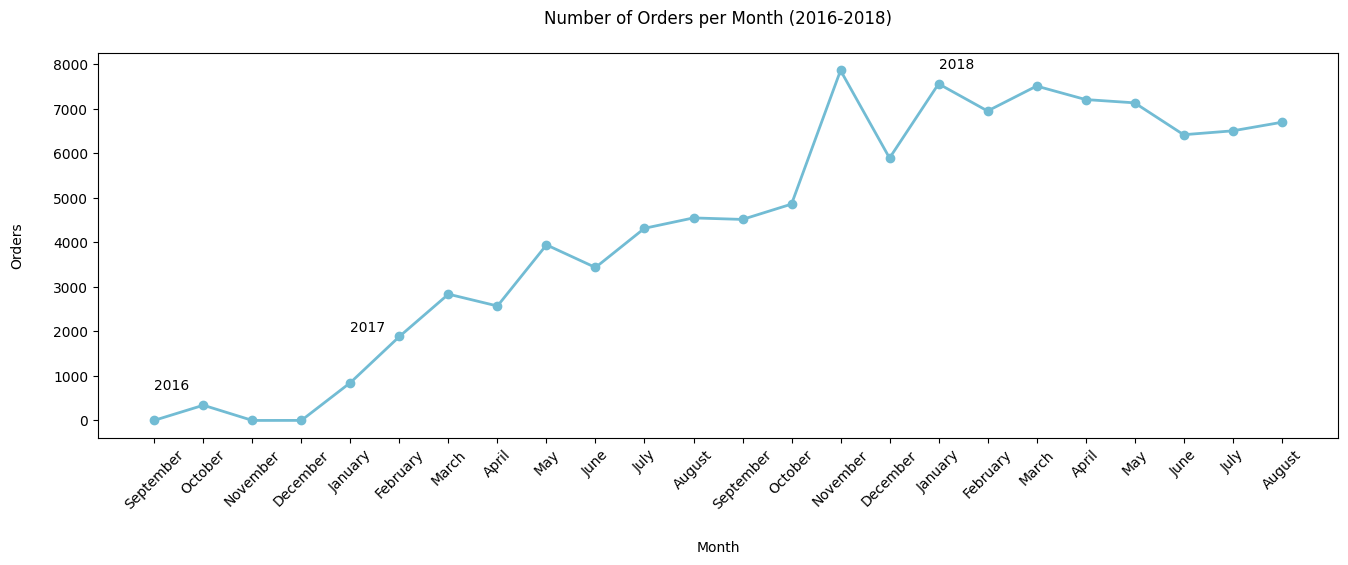

In [1325]:
monthly_orders_revenue_df['month'] = pd.to_datetime(monthly_orders_revenue_df['time']).dt.strftime('%B')

plt.figure(figsize=(16, 5))
plt.plot(
    monthly_orders_revenue_df['time'], 
    monthly_orders_revenue_df['order'],
    marker='o', 
    linewidth=2,
    color="#72BCD4")

plt.title('Number of Orders per Month (2016-2018)', pad=21)
plt.xlabel('Month', labelpad=21)
plt.xticks(range(len(monthly_orders_revenue_df['time'])), monthly_orders_revenue_df['month'], rotation=45)
plt.ylabel('Orders', labelpad=21)
plt.text(0, 700, '2016')
plt.text(4, 2000, '2017')
plt.text(16, 7900, '2018')
plt.show()

C:\Users\Vito\AppData\Local\Temp\ipykernel_5152\2752407631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_orders_revenue_df['month'] = pd.to_datetime(monthly_orders_revenue_df['time']).dt.strftime('%B')


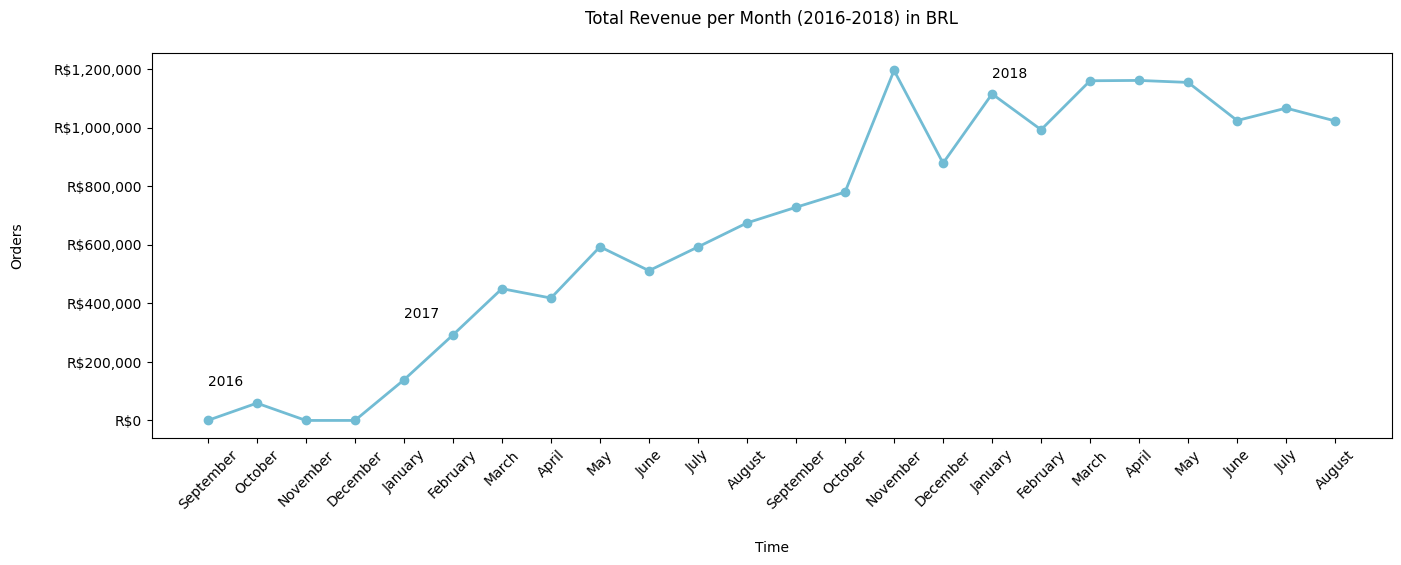

In [1326]:
monthly_orders_revenue_df['month'] = pd.to_datetime(monthly_orders_revenue_df['time']).dt.strftime('%B')

plt.figure(figsize=(16, 5))
plt.plot(
    monthly_orders_revenue_df['time'], 
    monthly_orders_revenue_df['revenue'],
    marker='o', 
    linewidth=2,
    color="#72BCD4")

formatter = ticker.FuncFormatter(lambda x, pos: 'R${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Revenue per Month (2016-2018) in BRL', pad=21)
plt.xlabel('Time', labelpad=21)
plt.xticks(range(len(monthly_orders_revenue_df['time'])), monthly_orders_revenue_df['month'], rotation=45)
plt.ylabel('Orders', labelpad=21)
plt.text(0, 120000, '2016')
plt.text(4, 350000, '2017')
plt.text(16, 1170000, '2018')
plt.show()

### Pertanyaan 2: Bagaimana performa produk yang dijual berdasarkan kategorinya? (Untuk mengetahui kualitas produk yang dijual dan apa yang perlu dikembangkan)

In [1327]:
product_reviews_df = orders_reviews_items_products_df.groupby('product_category_name').agg({'review_score': 'mean'}).sort_values(by='review_score', ascending=False)
product_reviews_df.index.rename('product_category', inplace=True)
product_reviews_df = product_reviews_df.reset_index()
product_reviews_df.head(8)

,product_category,review_score
0,cds_dvds_musicais,4.642857
1,fashion_roupa_infanto_juvenil,4.500000
2,livros_interesse_geral,4.446266
3,construcao_ferramentas_ferramentas,4.444444
4,flores,4.419355
5,livros_importados,4.400000
6,livros_tecnicos,4.368421
7,alimentos_bebidas,4.315412


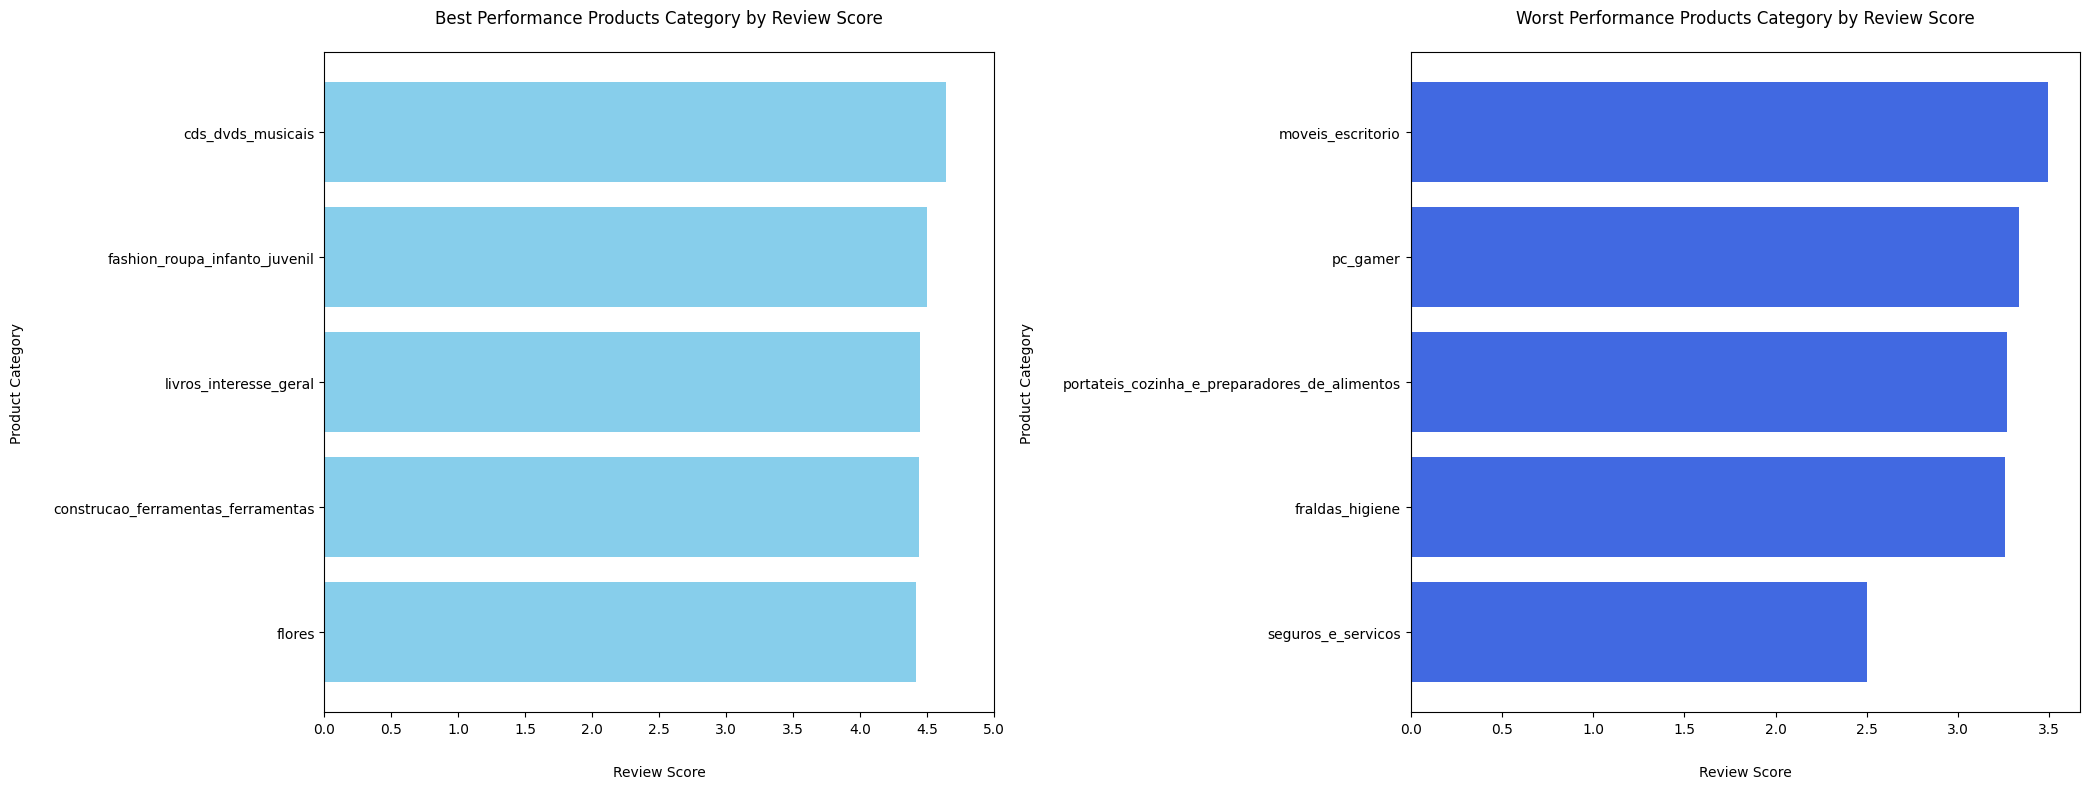

In [1328]:
top_5_product_reviews_df = product_reviews_df[:5]
bottom_5_product_reviews_df = product_reviews_df[-5:]

fig, axs = plt.subplots(1, 2, figsize=(21, 8)) 

axs[0].barh(top_5_product_reviews_df['product_category'], top_5_product_reviews_df['review_score'], color='skyblue') 
axs[0].set_title('Best Performance Products Category by Review Score', pad=21) 
axs[0].set_xlabel('Review Score', labelpad=21)
axs[0].set_xticks(np.arange(0, 5.5, 0.5))
axs[0].set_ylabel('Product Category', labelpad=21)
axs[0].invert_yaxis() 

axs[1].barh(bottom_5_product_reviews_df['product_category'], bottom_5_product_reviews_df['review_score'], color='royalblue') 
axs[1].set_title('Worst Performance Products Category by Review Score', pad=21) 
axs[1].set_xlabel('Review Score', labelpad=21)
axs[1].set_ylabel('Product Category', labelpad=21)
axs[1].invert_yaxis() 

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana performa waktu pengiriman? (Untuk dapat mengoptimasi waktu pengiriman)

In [1329]:
orders_payments_customers_df['delivery_time'].describe()

count    100753.000000
mean         12.106498
std           9.555147
min           1.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: delivery_time, dtype: float64

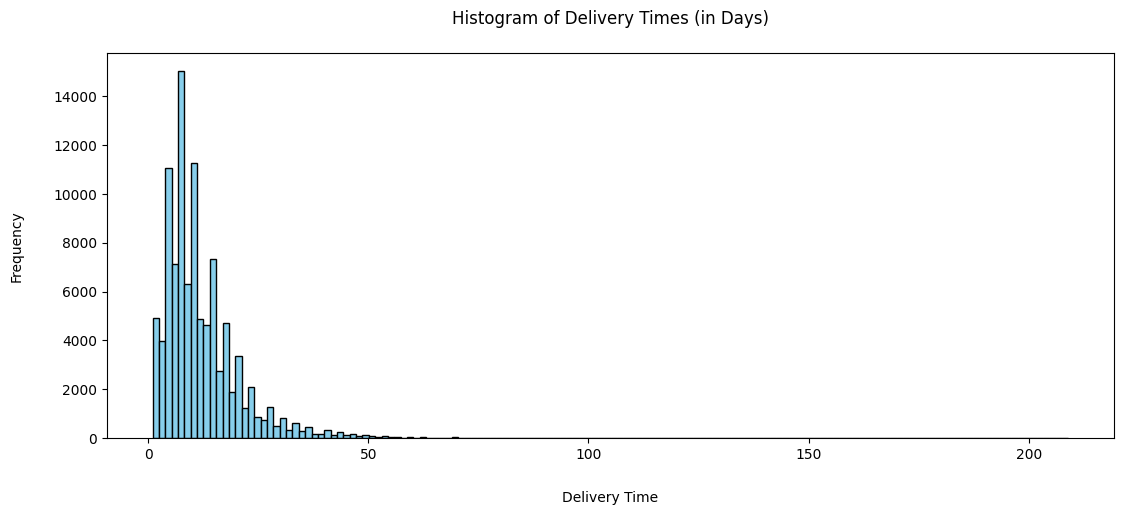

In [1330]:
plt.figure(figsize=(13, 5))
plt.hist(orders_payments_customers_df['delivery_time'], bins=144, color='skyblue', edgecolor='black')
plt.title('Histogram of Delivery Times (in Days)', pad=21)
plt.xlabel('Delivery Time', labelpad=21)
plt.ylabel('Frequency', labelpad=21)
plt.show()


### Pertanyaan 4: Bagaimana demografi pelanggan? (Untuk mengetahui karakteristik pelanngan) (RFM)

In [1331]:
customers_df.head(8)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e735b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG


Berdasarkan kota

In [1332]:
by_city_df = orders_payments_customers_df.groupby(by="customer_city").customer_id.nunique().reset_index()
by_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
by_city_df

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


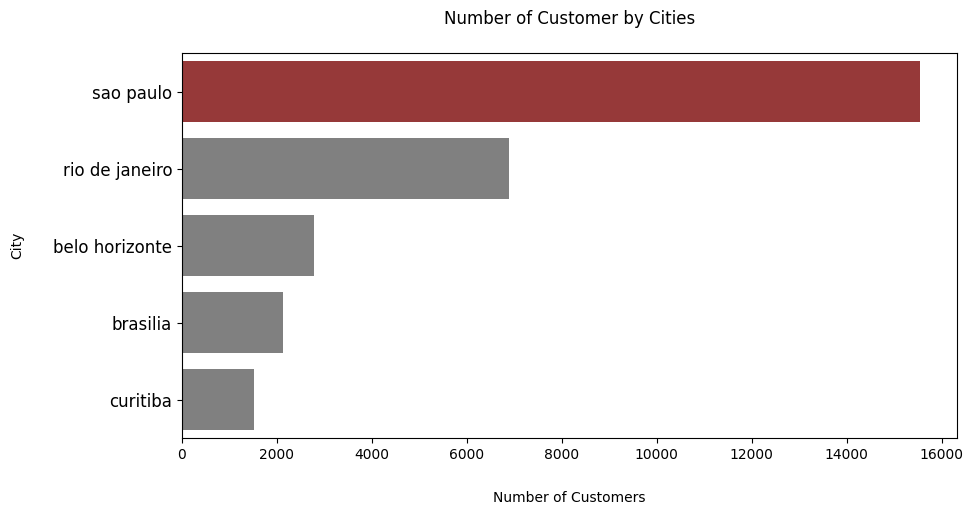

In [1333]:
top_5_by_city_df = by_city_df.sort_values(by="customer_count", ascending=False)[:5]

colors = ['brown'] + ['grey'] * (len(top_5_by_city_df) - 1)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=top_5_by_city_df.sort_values(by="customer_count", ascending=False),
    palette=colors,
    hue="customer_city"
)
plt.title("Number of Customer by Cities", pad=21)
plt.ylabel('City', labelpad=21)
plt.xlabel('Number of Customers', labelpad=21)
plt.tick_params(axis='y', labelsize=12)
plt.show()

RFM Analysis

In [1334]:
orders_payments_customers_df['order_purchase_timestamp'].sample(8)

30739   2017-11-29 09:23:47
36811   2017-06-13 21:11:56
72536   2018-04-07 08:33:36
24675   2018-03-15 14:39:28
20721   2017-05-21 18:53:29
669     2018-04-15 22:11:11
20164   2017-09-03 16:44:56
52200   2018-03-02 21:15:46
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [1335]:
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')


# Calculate Recency
latest_order_date = orders_customers_df.groupby('customer_unique_id')['order_purchase_timestamp'].max()
recent_date =  orders_customers_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
recency_df = (recent_date - latest_order_date).dt.days
rfm_df = pd.DataFrame(recency_df).reset_index()
rfm_df.columns = ['customer_unique_id', 'recency']

# Calculate Frequency
frequency_df = orders_customers_df.groupby('customer_unique_id')['order_id'].count()
rfm_df['frequency'] = frequency_df.values
rfm_df.sample(8)
# rfm_df.describe()

# Calculate Monetary
monetary_df = orders_payments_customers_df.groupby('customer_unique_id')['payment_value'].sum()
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')
rfm_df.rename(columns={
    "payment_value": "monetary"
}, inplace=True)
# rfm_df.describe()

# drop rows if the monetry is 0
rfm_df = rfm_df[rfm_df['monetary'] > 0]


In [1336]:
rfm_df.describe()

,recency,frequency,monetary
count,96091.000000,96091.000000,96091.000000
mean,288.737926,1.034811,166.595906
std,153.405643,0.214389,231.432149
min,1.000000,1.000000,9.590000
25%,164.000000,1.000000,63.125000
50%,269.000000,1.000000,108.000000
75%,398.000000,1.000000,183.530000
max,773.000000,17.000000,13664.080000


In [1337]:
rfm_df.sample(8)

,customer_unique_id,recency,frequency,monetary
94535,fbd6f827799c2af60c9b3de56d52917a,427,1,125.43
69041,b7b4d3feb264b507cd9a5742120c73e7,254,1,44.09
59422,9e22c659d0383dfce29dd8008e577b1f,530,1,200.15
9469,1905930db2756081b13e8a504adc206b,327,1,24.17
44482,76531fa9e9666a24725759d1cff317de,471,1,85.14
18207,3050b3ce774db15c4112fefb072ac5c8,161,1,60.95
32725,56eb8efb53949c3199aa0bebeb50a162,323,1,28.57
91708,f43b5eb3178b2129b9c4ea51024fcbd9,201,1,61.79


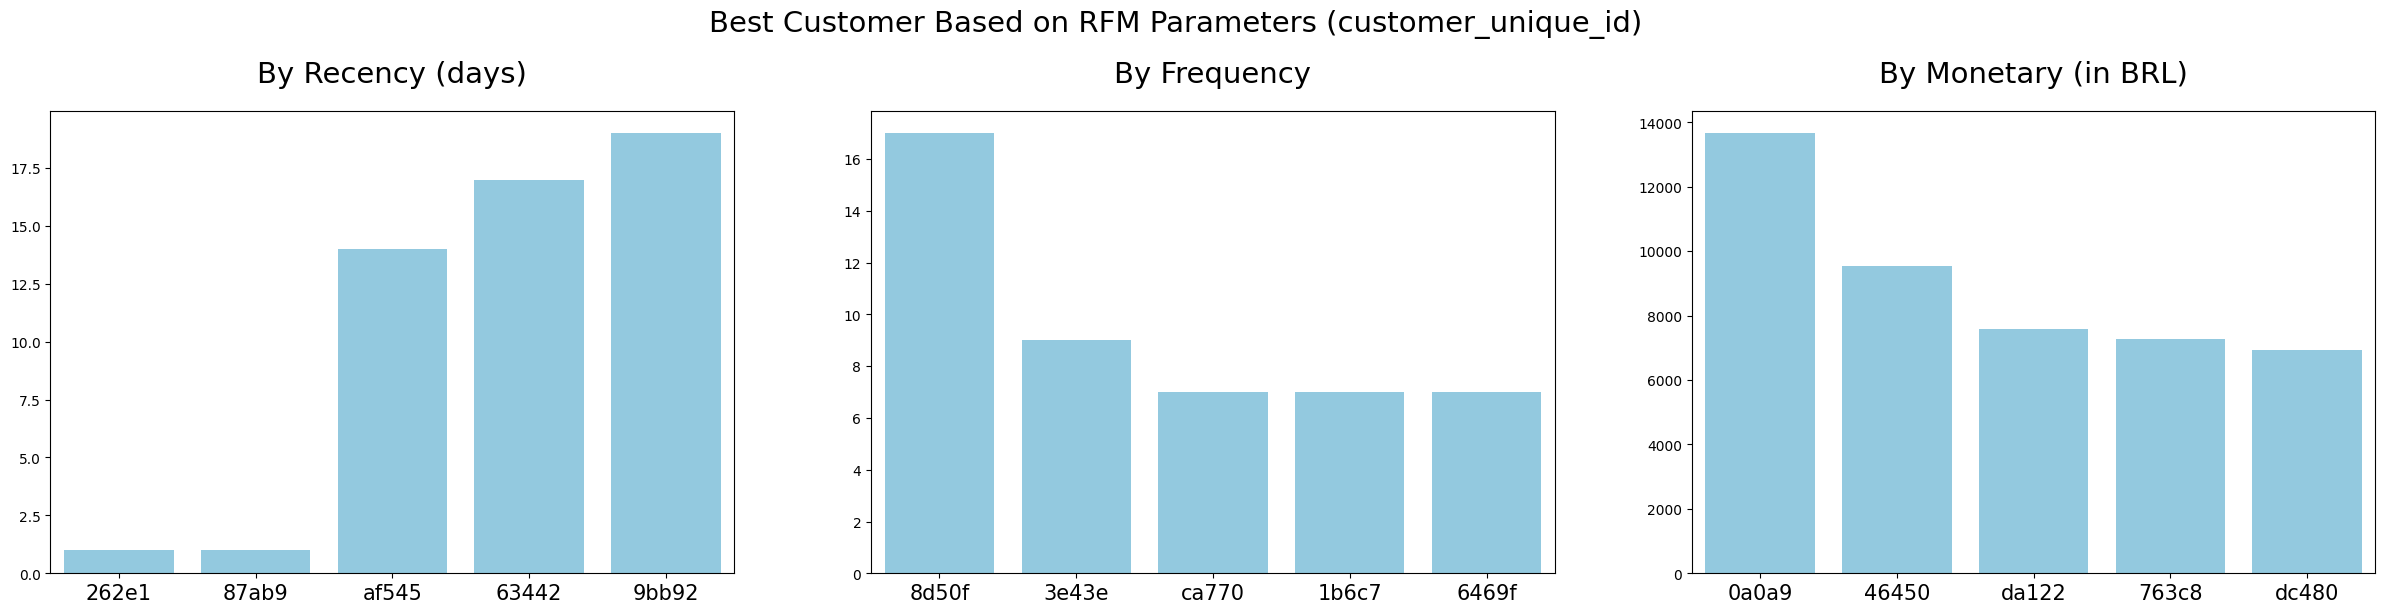

In [1338]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

rfm_df['truncated_customer_unique_id'] = rfm_df['customer_unique_id'].apply(lambda x: x[:5])

colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue']
sns.barplot(y="recency", x="truncated_customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue='truncated_customer_unique_id', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", pad=21, fontsize=21)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="truncated_customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue='truncated_customer_unique_id', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", pad=21, fontsize=21)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="truncated_customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue='truncated_customer_unique_id', ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary (in BRL)", loc="center", pad=21, fontsize=21)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=21, y=1.05)
plt.show()

In [1339]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,truncated_customer_unique_id,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,00003,73189.5,46547.5,60810.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,0000b,72183.5,46547.5,2085.5
2,0000f46a3911fa3c0805444483337064,586,1,86.22,0000f,3566.0,46547.5,37780.5
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,0000f,27885.5,46547.5,11719.0
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,0004a,32753.0,46547.5,74773.5


In [1340]:
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], q=5, labels=False, duplicates='drop')
rfm_df['r_score'] = rfm_df['r_score'].max() - rfm_df['r_score'] + 1
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'], q=5, labels=False, duplicates='drop') + 1
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], q=5, labels=False, duplicates='drop') + 1

rfm_df['rfm_score'] = rfm_df['r_score'] + rfm_df['f_score'] + rfm_df['m_score']

rfm_df[['recency', 'r_score', 'frequency', 'f_score', 'monetary', 'm_score', 'rfm_score']].sample(8)


,recency,r_score,frequency,f_score,monetary,m_score,rfm_score
96030,140,5,1,1,22.78,1,7
95178,562,1,1,1,764.52,5,7
11267,392,2,1,1,173.88,4,7
60252,316,3,1,1,416.54,5,9
28059,279,3,1,1,62.91,2,6
59735,185,4,1,1,136.88,4,9
91199,531,1,1,1,1033.12,5,7
39023,151,4,1,1,427.23,5,10


In [1341]:
# Define function to assign RFM segments
def segment_rfm(row):
    if row['rfm_score'] >= 12:
        return 'Top Customers'
    elif row['rfm_score'] >= 9:
        return 'High Value Customers'
    elif row['rfm_score'] >= 6:
        return 'Medium Value Customer'
    elif row['rfm_score'] >= 3:
        return 'Low Value Customers'
    else:
        return 'Lost Customers'

# Apply segmentation function to each row
rfm_df['segment'] = rfm_df.apply(segment_rfm, axis=1)

# Print the result
print(rfm_df[['recency', 'frequency', 'monetary', 'rfm_score', 'segment']])

       recency  frequency  monetary  rfm_score                segment
0          161          1    141.90          9   High Value Customers
1          164          1     27.19          6  Medium Value Customer
2          586          1     86.22          4    Low Value Customers
3          370          1     43.62          4    Low Value Customers
4          337          1    196.89          7  Medium Value Customer
...        ...        ...       ...        ...                    ...
96088      496          1   2067.42          7  Medium Value Customer
96089      311          1     84.58          6  Medium Value Customer
96090      618          1    112.46          5    Low Value Customers
96091      169          1    133.69          9   High Value Customers
96092      533          1     71.56          4    Low Value Customers

[96091 rows x 5 columns]


In [1342]:
customer_segment_df = rfm_df.groupby(by="segment", as_index=False).customer_unique_id.nunique()
customer_segment_df

,segment,customer_unique_id
0,High Value Customers,23434
1,Low Value Customers,23621
2,Medium Value Customer,49036


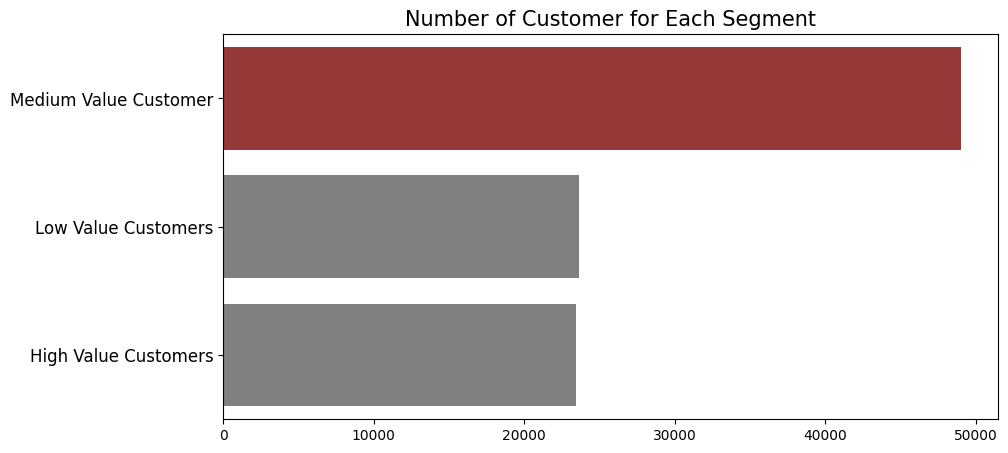

In [1349]:
plt.figure(figsize=(10, 5))
colors = ['brown', 'grey', 'grey']

sns.barplot(
    x="customer_unique_id", 
    y="segment",
    data=customer_segment_df.sort_values(by="segment", ascending=False),
    palette=colors,
    hue='segment'
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2